In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [113]:
rawdata = pd.read_csv("../../data/raw/netflix.csv") #read data
rawdata = rawdata.dropna() #drop all null rows
del rawdata['show_id'] #delete show id column as not interested
rawdata.columns = ['Type','Title','Director','Cast','Country','Date Added','Release Year','Rating','Duration','Genre','Description'] #rename columns
rawdata['Date Added'] = pd.to_datetime(rawdata['Date Added']).dt.date #change to date data to compare later on
rawdata.head() #print

,Type,Title,Director,Cast,Country,Date Added,Release Year,Rating,Duration,Genre,Description
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...


In [114]:
from scripts import project_functions
df = project_functions.load_and_process("../../data/raw/netflix.csv")
df.head()

,Type,Title,Director,Cast,Country,Date Added,Release Year,Rating,Duration,Genre,Desctiption
0,Movie,7:19,Jorge Michel Grau,"[Demián Bichir, Héctor Bonilla, Oscar Serrano,...",[Mexico],2016-12-23,2016,TV-MA,93 min,"[Dramas, International Movies]",After a devastating earthquake hits Mexico Cit...
1,Movie,23:59,Gilbert Chan,"[Tedd Chan, Stella Chung, Henley Hii, Lawrence...",[Singapore],2018-12-20,2011,R,78 min,"[Horror Movies, International Movies]","When an army recruit is found dead, his fellow..."
2,Movie,9,Shane Acker,"[Elijah Wood, John C. Reilly, Jennifer Connell...",[United States],2017-11-16,2009,PG-13,80 min,"[Action & Adventure, Independent Movies, Sci-F...","In a postapocalyptic world, rag-doll robots hi..."
3,Movie,21,Robert Luketic,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, Aa...",[United States],2020-01-01,2008,PG-13,123 min,[Dramas],A brilliant group of students become card-coun...
4,TV Show,46,Serdar Akar,"[Erdal Beşikçioğlu, Yasemin Allen, Melis Birka...",[Turkey],2017-07-01,2016,TV-MA,1 Season,"[International TV Shows, TV Dramas, TV Mysteries]",A genetics professor experiments with a treatm...


In [120]:
#sns.countplot(y = 'Country', data = df, order = df['Country'].value_counts().iloc[:10].index).set(title = "Country Released")
temp = Counter()
temp1 = dict()
for genre in df['Genre']:
    temp += Counter(genre)
for name, values in temp.items():
    if(values < df.shape[0]*0.1):
        if("other" in temp1):
            temp1["other"] += values
        else:
            temp1["other"] = values
    else:
        temp1[name] = values

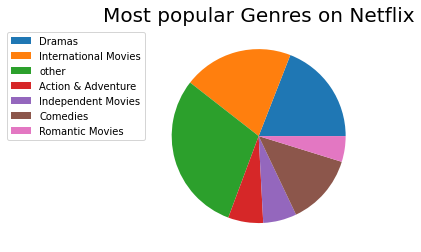

In [86]:
plt.pie(x = [v for name, v in temp1.items()], autopct = None)
plt.legend(list(temp1.keys()), bbox_to_anchor = [0,0,0,1])
plt.title("Most popular Genres on Netflix", size = 20)
plt.show()

In [4]:
print("What're the leading genres of Netflix movies?")
print("We can clearly see that most popular Genres of films on Netflix is International Movies, Dramas and Comedies. They take up almost 75% of all movies on Netflix")

What're the leading genres of Netflix movies?
We can clearly see that most popular Genres of films on Netflix is International Movies, Dramas and Comedies. They take up almost 75% of all movies on Netflix


In [122]:
temp.clear()
temp1.clear()
for countries in df['Country']:
    temp += Counter(countries)
for name, values in temp.items():
    if(values < df.shape[0]*0.02):
        if("other" in temp1):
            temp1["other"] += values
        else:
            temp1["other"] = values
    else:
        temp1[name] = values

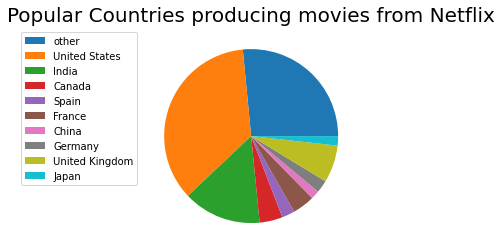

In [123]:
plt.pie(x = [v for name, v in temp1.items()], autopct = None)
plt.legend(list(temp1.keys()), bbox_to_anchor = [0,0,0,1])
plt.title("Popular Countries producing movies from Netflix", size = 20)
plt.show()

In [5]:
print("Which Countries produce the most films available on Netflix?")
print("United States comes first in the production of Netflix films while India comes second. They both take up to 1/4 of the whole pie chart each.")

Which Countries produce the most films available on Netflix?
United States comes first in the production of Netflix films while India comes second. They both take up to 1/4 of the whole pie chart each.


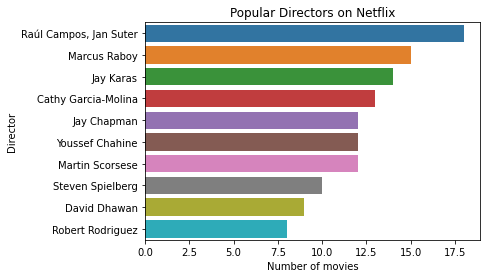

In [126]:
sns.countplot(data=df, y = 'Director', order = df['Director'].value_counts().iloc[:10].index).set(title = "Popular Directors on Netflix", xlabel = "Number of movies")
plt.show()

In [3]:
print("What director is the best in Netflix?")
print("Here is a visual of which Directors have the most films featured on Netflix. It is clear that Rausl Campos and Jan Suter are the most popular directors on Netflix.")

What director is the best in Netflix?
Here is a visual of which Directors have the most films featured on Netflix. It is clear that Rausl Campos and Jan Suter are the most popular directors on Netflix.
